# Data Preparing

In [2]:
# This program is written by me as a part of self-learning project. 
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install sklearn
from sklearn import metrics
from sklearn import svm
from sklearn.metrics import accuracy_score# calculates accuracy score for a set of predicted labels
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
!pip install xgboost
from xgboost import XGBClassifier #XG Boost Algorithm
from sklearn.tree import DecisionTreeClassifier #Decision Tree Classifier algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm

In [3]:
data= pd.read_csv('Parkinsson Disease.csv')

In [15]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [4]:
data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

# Data Cleaning

In [18]:
# check for null values
data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [5]:
#0 is healthy 1 is parkison affected
data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

In [6]:
#grouping dataset on the target variable
data.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


In [7]:
#separating features and target variable
#droping name and status column
#assigning status column to another variable
y=data[['status']]
x=data.drop(['name','status'],axis=1)

# Data Visualization

<AxesSubplot:ylabel='status'>

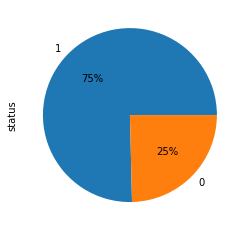

In [22]:
data['status'].value_counts().plot(kind='pie', autopct = "%1.0f%%")

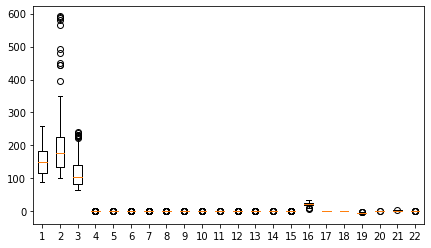

In [10]:
fig = plt.figure(figsize =(7, 4))
plt.boxplot(x)
plt.show()

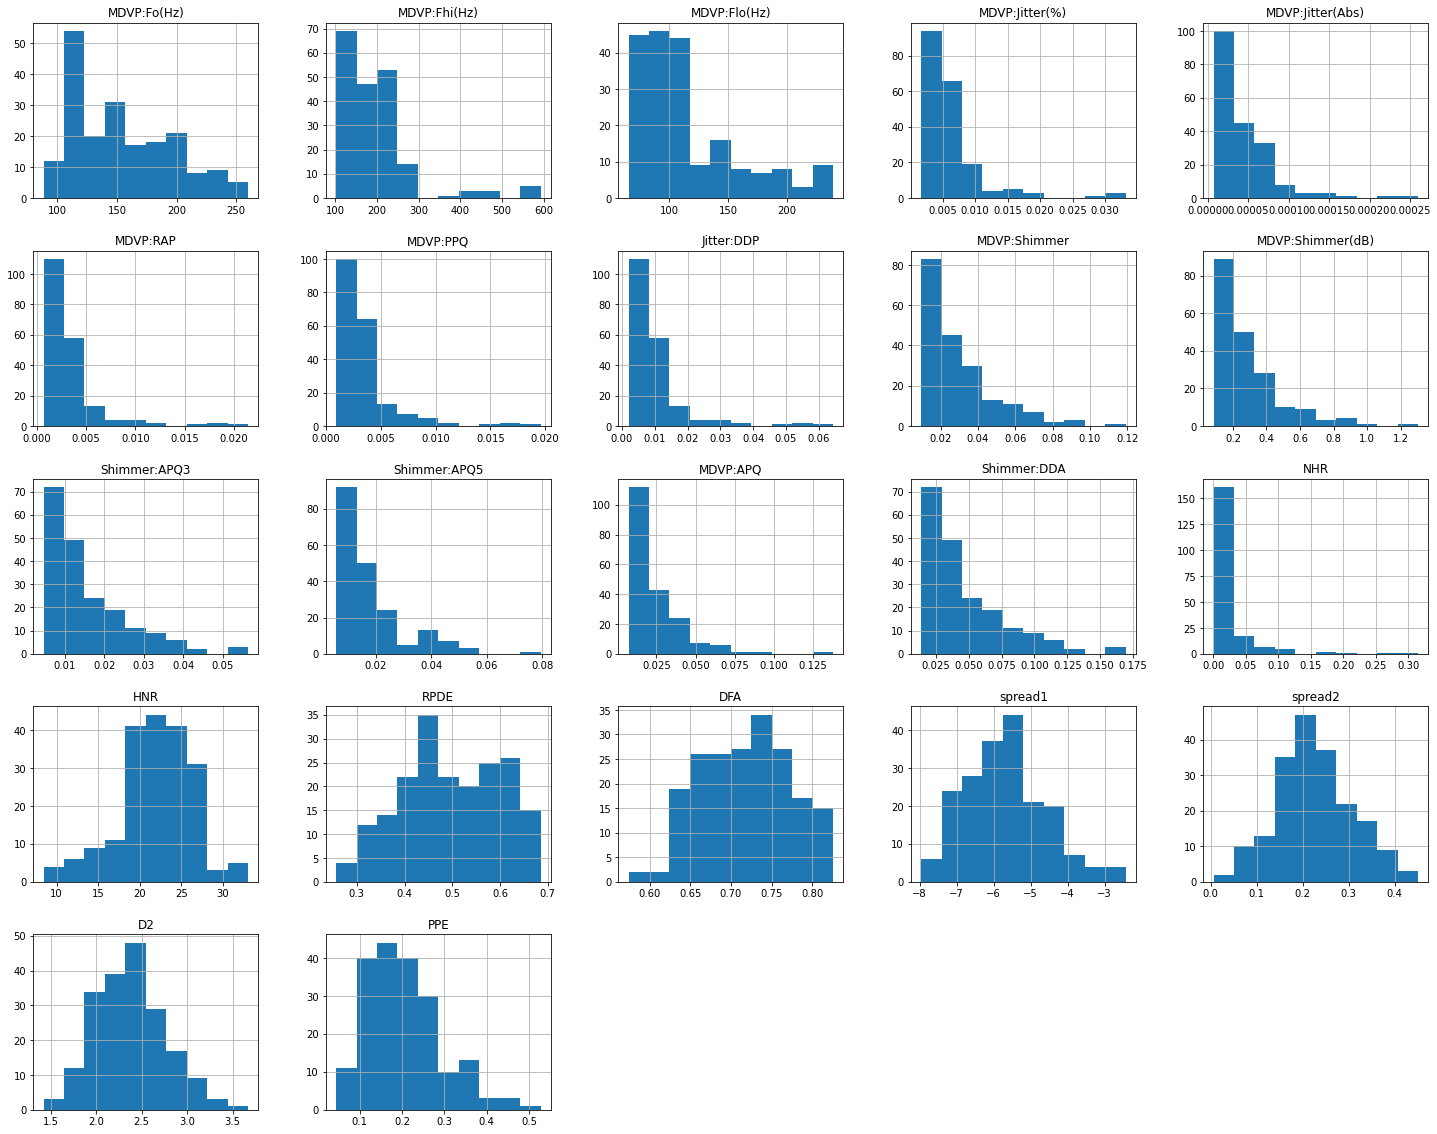

In [28]:
# features and labels
x_f = data.loc[:,data.columns!='status'].values[:,1:]
x1 = data.loc[:,data.columns!='status']
y_f = data.loc[:,'status'].values
y1 = data.loc[:,'status']
import matplotlib.pyplot as plt
# analyzing the features 
x1.hist(figsize=(25,20))
plt.show()

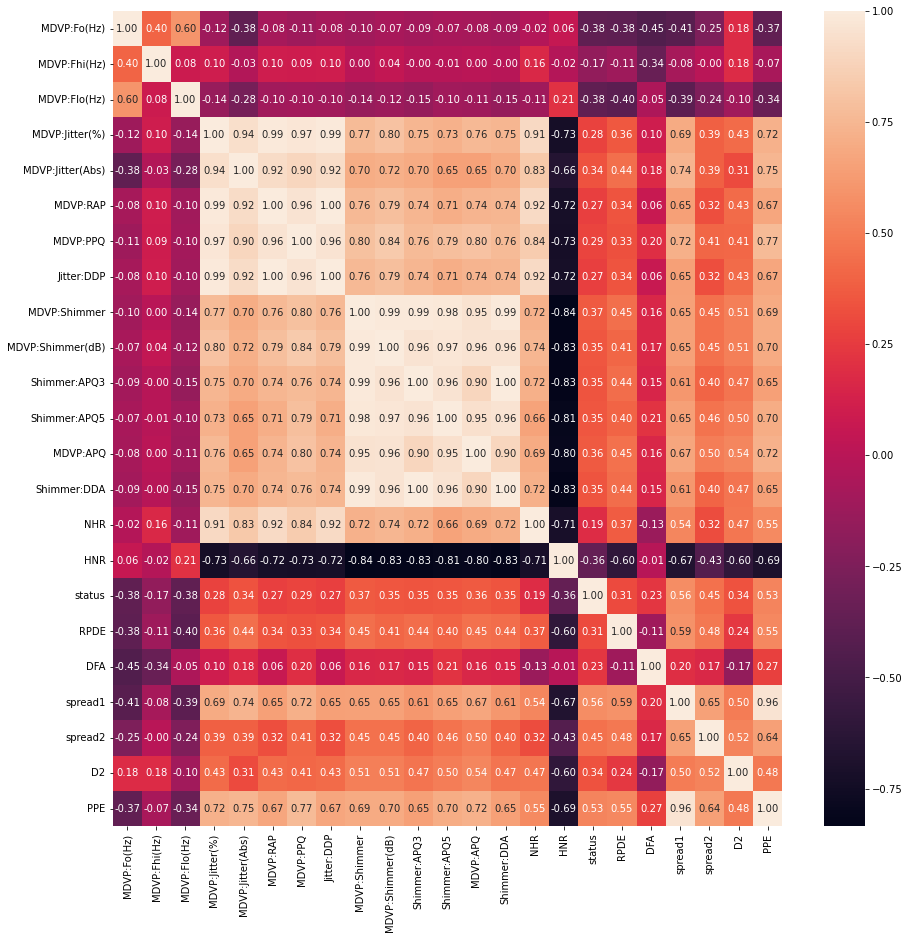

In [30]:
import seaborn as sns
plt.figure(figsize=(15,15))
# correlation matrix
dataplot = sns.heatmap(data.corr(), annot=True, fmt='.2f')

# Build and evaluate the model

MODEL 1 - XG Boost
Coeff. of determination on train set: 1.00
Coeff. of determination on test set: 0.95
The Mean Absolute Error is: 0.05
The root Mean Squared Error is: 0.23
94.87179487179486
Confusion Matrix: 

Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.93      0.96        29

    accuracy                           0.95        39
   macro avg       0.92      0.97      0.94        39
weighted avg       0.96      0.95      0.95        39



Text(0.5, 1.0, 'Confusion Matrix')

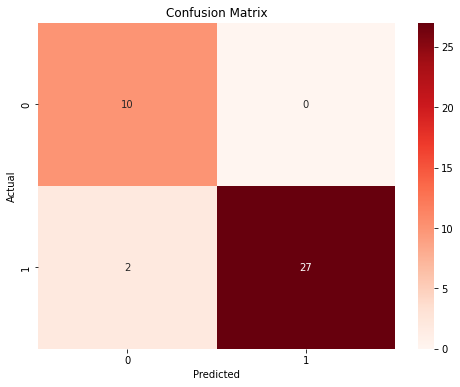

In [37]:
#Model 1 - XG Boost
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
modelxgb = XGBClassifier()
modelxgb.fit(x_train, y_train)
predictxgb = modelxgb.predict(x_test)
print("MODEL 1 - XG Boost")
# R^2 for train dataset
print(f'Coeff. of determination on train set:{modelxgb.score(x_train, y_train): .2f}') 
#R^2 for test dataset
print(f'Coeff. of determination on test set:{modelxgb.score(x_test, y_test): .2f}')
print(f'The Mean Absolute Error is:{metrics.mean_absolute_error(y_test, predictxgb): .2f}')
print(f'The root Mean Squared Error is:{np.sqrt(metrics.mean_squared_error(y_test, predictxgb)): .2f}')
print(accuracy_score(y_test, predictxgb)*100)
# confusion matrix
print("Confusion Matrix: ")
cm=confusion_matrix(y_test ,predictxgb)
print("\nClassification Report:")
print(classification_report(y_test, predictxgb))
plt.figure(figsize=(8,6))
fg=sns.heatmap(cm,annot=True,cmap="Reds")
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")



MODEL 2 -  Decision Tree Classifier
Coeff. of determination on train set: 0.99
Coeff. of determination on test set: 0.87
The Mean Absolute Error is: 0.13
The root Mean Squared Error is: 0.36
87.17948717948718
Confusion Matrix: 

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        10
           1       0.88      0.97      0.92        29

    accuracy                           0.87        39
   macro avg       0.87      0.78      0.81        39
weighted avg       0.87      0.87      0.86        39



Text(0.5, 1.0, 'Confusion Matrix')

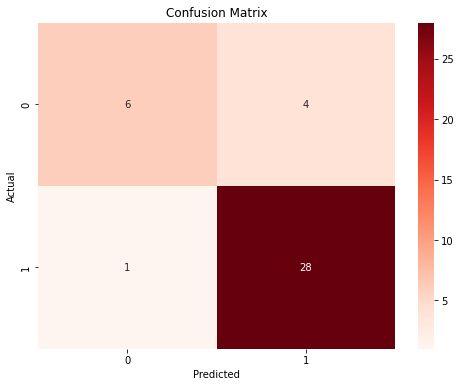

In [41]:
#Model 2 - Decision Tree Classifier
tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(x_train, y_train)
tree_yhat = tree_model.predict(x_test)
print("MODEL 2 -  Decision Tree Classifier")
print(f'Coeff. of determination on train set:{tree_model.score(x_train, y_train): .2f}') 
print(f'Coeff. of determination on test set:{tree_model.score(x_test, y_test): .2f}')
print(f'The Mean Absolute Error is:{metrics.mean_absolute_error(y_test, tree_yhat): .2f}')
print(f'The root Mean Squared Error is:{np.sqrt(metrics.mean_squared_error(y_test, tree_yhat)): .2f}')
print(accuracy_score(y_test, tree_yhat)*100)
# confusion matrix
print("Confusion Matrix: ")
cm=confusion_matrix(y_test ,tree_yhat)
print("\nClassification Report:")
print(classification_report(y_test, tree_yhat))
plt.figure(figsize=(8,6))
fg=sns.heatmap(cm,annot=True,cmap="Reds")
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")


C:\python\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MODEL 3 - Logistic Regression
Coeff. of determination on train set: 0.92
Coeff. of determination on test set: 0.95
The Mean Absolute Error is: 0.10
The root Mean Squared Error is: 0.32
89.74358974358975
Confusion Matrix: 

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.93      0.93      0.93        29

    accuracy                           0.90        39
   macro avg       0.87      0.87      0.87        39
weighted avg       0.90      0.90      0.90        39



C:\python\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'Confusion Matrix')

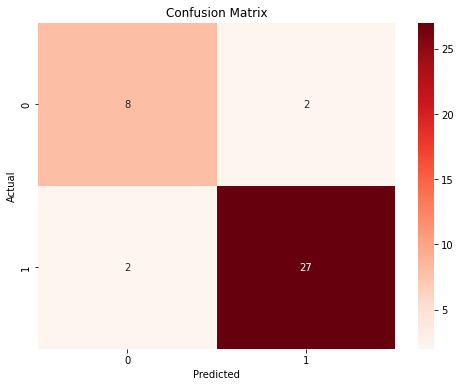

In [40]:
#Model 3 - Logistic Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_yhat = lr.predict(x_test)
print("MODEL 3 - Logistic Regression")
print(f'Coeff. of determination on train set:{tree_model.score(x_train, y_train): .2f}') 
print(f'Coeff. of determination on test set:{tree_model.score(x_test, y_test): .2f}')
print(f'The Mean Absolute Error is:{metrics.mean_absolute_error(y_test,lr_yhat): .2f}')
print(f'The root Mean Squared Error is:{np.sqrt(metrics.mean_squared_error(y_test, lr_yhat)): .2f}')
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,lr_yhat)*100)
print("Confusion Matrix: ")
cm=confusion_matrix(y_test ,lr_yhat)
print("\nClassification Report:")
print(classification_report(y_test, lr_yhat))
plt.figure(figsize=(8,6))
fg=sns.heatmap(cm,annot=True,cmap="Reds")
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")



MODEL 4 - K-Nearest Neighbors
Coeff. of determination on train set: 0.99
Coeff. of determination on test set: 0.87
The Mean Absolute Error is: 0.15
The root Mean Squared Error is: 0.39
84.61538461538461
Confusion Matrix: 

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.90      0.75        10
           1       0.96      0.83      0.89        29

    accuracy                           0.85        39
   macro avg       0.80      0.86      0.82        39
weighted avg       0.88      0.85      0.85        39



C:\python\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Text(0.5, 1.0, 'Confusion Matrix')

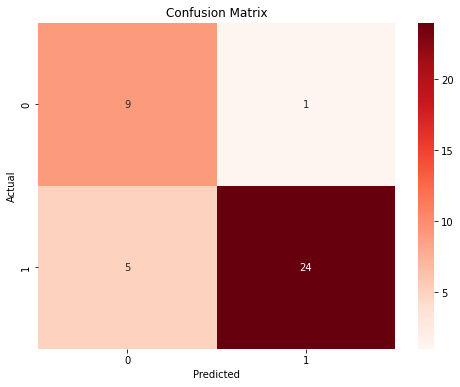

In [43]:
# Model 4 - K-Nearest Neighbors
n = 5
knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(x_train, y_train)
knn_yhat = knn.predict(x_test)
print("MODEL 4 - K-Nearest Neighbors")
print(f'Coeff. of determination on train set:{tree_model.score(x_train, y_train): .2f}') 
print(f'Coeff. of determination on test set:{tree_model.score(x_test, y_test): .2f}')
print(f'The Mean Absolute Error is:{metrics.mean_absolute_error(y_test,knn_yhat): .2f}')
print(f'The root Mean Squared Error is:{np.sqrt(metrics.mean_squared_error(y_test,knn_yhat)): .2f}')
print(accuracy_score(y_test,knn_yhat)*100)
print("Confusion Matrix: ")
cm=confusion_matrix(y_test ,knn_yhat)
print("\nClassification Report:")
print(classification_report(y_test,knn_yhat))
plt.figure(figsize=(8,6))
fg=sns.heatmap(cm,annot=True,cmap="Reds")
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")



MODEL 5 - Random Forest Tree Classifier
Coeff. of determination on train set: 0.99
Coeff. of determination on test set: 0.87
The Mean Absolute Error is: 0.15
The root Mean Squared Error is: 0.23
94.87179487179486
Confusion Matrix: 

Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       1.00      0.93      0.96        29

    accuracy                           0.95        39
   macro avg       0.92      0.97      0.94        39
weighted avg       0.96      0.95      0.95        39



C:\Users\Pravy\AppData\Local\Temp/ipykernel_21728/4240241353.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


Text(0.5, 1.0, 'Confusion Matrix')

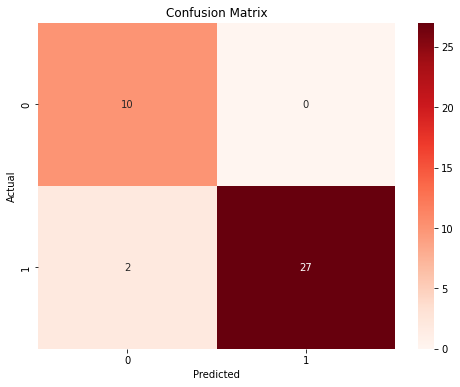

In [45]:
#Model 5 - Random Forest Tree 
rf = RandomForestClassifier(max_depth = 4)
rf.fit(x_train, y_train)
rf_yhat = rf.predict(x_test)
print("MODEL 5 - Random Forest Tree Classifier")
print(f'Coeff. of determination on train set:{tree_model.score(x_train, y_train): .2f}') 
print(f'Coeff. of determination on test set:{tree_model.score(x_test, y_test): .2f}')
print(f'The Mean Absolute Error is:{metrics.mean_absolute_error(y_test,knn_yhat): .2f}')
print(f'The root Mean Squared Error is:{np.sqrt(metrics.mean_squared_error(y_test,rf_yhat)): .2f}')
print(accuracy_score(y_test,rf_yhat)*100)
from sklearn.metrics import confusion_matrix
print("Confusion Matrix: ")
cm=confusion_matrix(y_test ,rf_yhat)
print("\nClassification Report:")
print(classification_report(y_test,rf_yhat))
plt.figure(figsize=(8,6))
fg=sns.heatmap(cm,annot=True,cmap="Reds")
figure=fg.get_figure()
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")

